In [14]:
# Import Libraries 
import pandas as pd
from scipy import stats 
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [13]:
# Read The wine.csv file
df = pd.read_csv('wine.csv') 
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


# EDA Processes

# Data Cleaning






In [11]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
dtype: int64

In [20]:
# Dropping the rows with missing values around the regions and designation will not be ideal, will loose majority of the DATA
#df.dropna(subset=['designation', 'region_1', 'region_2'], inplace=True)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


In [21]:
# For designation will replace missing values with unknown 
df['designation'].fillna(value='Unknown', inplace =True)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,Unknown,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",Unknown,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


In [23]:
# For region_1 and region_2 we will replace the missing values with the mode
df['region_1'].fillna(value=df['region_1'].mode()[0], inplace=True)
df['region_2'].fillna(value=df['region_2'].mode()[0], inplace=True)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,Central Coast,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,Central Coast,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,Unknown,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",Unknown,87,27.0,Bordeaux,Listrac-M√©doc,Central Coast,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


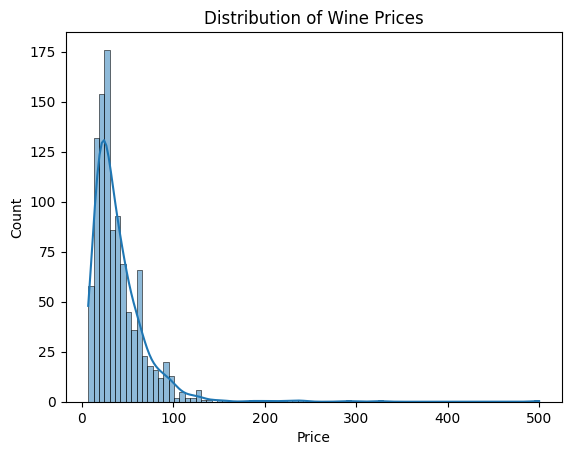

In [32]:
sns.histplot(df['price'], kde=True)

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Wine Prices')

# Show the plot
plt.show()

In [36]:
# For the price we will replace the missing values  with the mean
df['price'].fillna(df['price'].median(), inplace=True)
df


,Unnamed: 0,country,points,price,province,variety
0,0,US,96,235.0,California,Cabernet Sauvignon
1,1,Spain,96,110.0,Northern Spain,Tinta de Toro
2,2,US,96,90.0,California,Sauvignon Blanc
3,3,US,96,65.0,Oregon,Pinot Noir
4,4,France,95,66.0,Provence,Provence red blend
...,...,...,...,...,...,...
1098,1098,US,87,12.0,California,White Blend
1099,1099,US,87,20.0,New York,Riesling
1100,1100,US,87,28.0,Washington,Merlot
1101,1101,France,87,27.0,Bordeaux,Bordeaux-style Red Blend


In [33]:
# Drop columns that we will not use for the Analysis:

# Drop the "description" column
#df.drop("description", axis=1, inplace=True)

# Drop the "designation" column
#df.drop("designation", axis=1, inplace=True)

# Drop the "winery" column
#df.drop("winery", axis=1, inplace=True)

# Drop the "region_1" column
#df.drop("region_1", axis=1, inplace=True)

# Drop the "region_2" column
#df.drop("region_2", axis=1, inplace=True)
df

,Unnamed: 0,country,points,price,province,variety
0,0,US,96,235.0,California,Cabernet Sauvignon
1,1,Spain,96,110.0,Northern Spain,Tinta de Toro
2,2,US,96,90.0,California,Sauvignon Blanc
3,3,US,96,65.0,Oregon,Pinot Noir
4,4,France,95,66.0,Provence,Provence red blend
...,...,...,...,...,...,...
1098,1098,US,87,12.0,California,White Blend
1099,1099,US,87,20.0,New York,Riesling
1100,1100,US,87,28.0,Washington,Merlot
1101,1101,France,87,27.0,Bordeaux,Bordeaux-style Red Blend


In [38]:
df.describe() # Display summary of statistics

,Unnamed: 0,points,price
count,1103.000000,1103.000000,1103.000000
mean,551.000000,89.701723,39.765186
std,318.552978,2.390405,31.800110
min,0.000000,85.000000,7.000000
25%,275.500000,88.000000,22.000000
50%,551.000000,90.000000,31.000000
75%,826.500000,91.000000,49.000000
max,1102.000000,96.000000,500.000000


# Visualisation

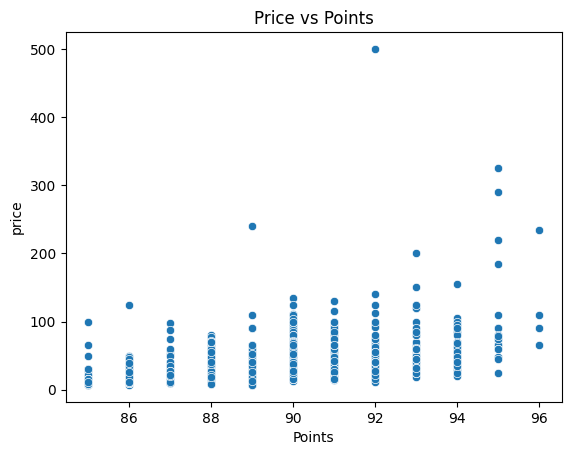

In [9]:
# Scatter plot of price vs points

sns.scatterplot( x='points', y='price', data=df)

# Set the labels and title
plt.xlabel('Points')
plt.ylabel('price')
plt.title('Price vs Points')

# Show the plot
plt.show()

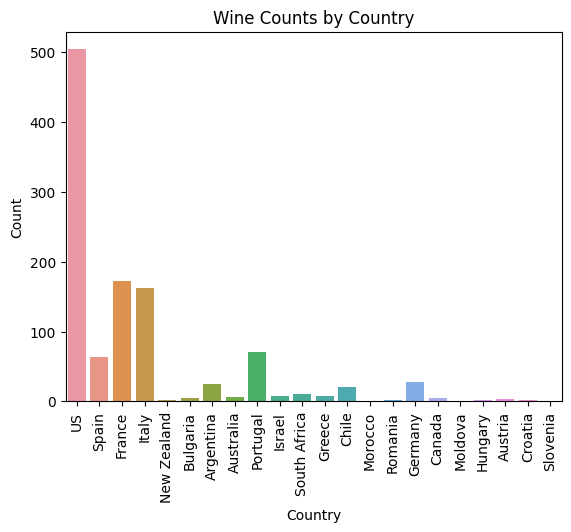

In [18]:
# Bar Chart for wine counts by couuntry

# Create a bar chart of wine counts by country
sns.countplot(x='country', data=df)

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Wine Counts by Country')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

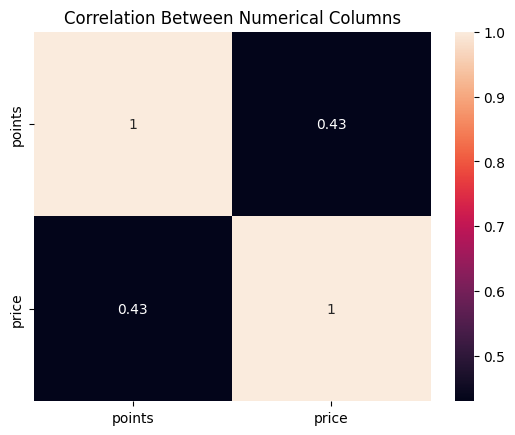

In [53]:
# Select the numerical columns for correlation analysis
numerical_columns = ['points', 'price']

# Create a heatmap of correlation between numerical columns
sns.heatmap(df[numerical_columns].corr(), annot=True)

# Set the title
plt.title('Correlation Between Numerical Columns')

# Show the plot
plt.show()

# Findings

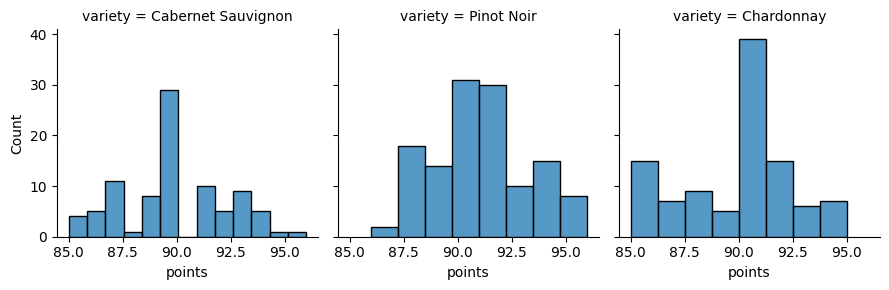

In [10]:
# Creating a multi-plot grid 

# Filter the dataset to only contain "Cabernet Sauvignon", "Pinot Noir", and "Chardonnay" wines
filtered_df = df[df["variety"].isin(["Cabernet Sauvignon", "Pinot Noir", "Chardonnay"])]

# Create a multi-plot grid of histograms for each wine variety
g = sns.FacetGrid(filtered_df, col="variety", col_wrap=3)
g.map(sns.histplot, "points")

In [2]:
# Create a word cloud for the province column
province_wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(wine_data['province']))
plt.figure(figsize=(12,8))
plt.imshow(province_wc)
plt.axis('off')
plt.show()

# Create a word cloud for the variety column
variety_wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(wine_data['variety']))
plt.figure(figsize=(12,8))
plt.imshow(variety_wc)
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined